In [69]:
# IMPORTS
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

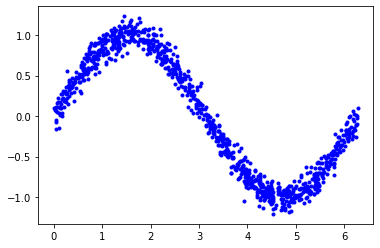

In [105]:
# CREATE DATA
NUM_SAMPLES = 1000

# Any number would do
SEED = 2345
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Uniformly distributed number between 0 to 2pi
x_vals = np.random.uniform(low=0, high=2*math.pi, size=NUM_SAMPLES)
np.random.shuffle(x_vals)

# The secret formula
y_vals = np.sin(x_vals)

# Scatter the value a bit
y_vals += 0.1 * np.random.randn(y_vals.size)

# Plot data
plt.plot(x_vals, y_vals, 'b.')
plt.show()

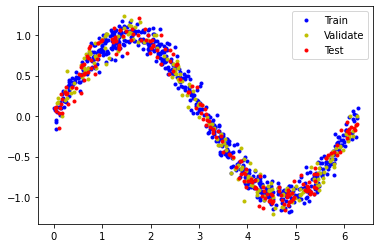

In [106]:
# Splits raw data for training
def split_data(vals, pos1, pos2):
  assert(pos1 + pos2 <= 1.0)
  TRAIN_SPLIT = int(pos1 * vals.size)
  TEST_SPLIT = int(TRAIN_SPLIT + pos2 * vals.size)
  train, test, validate = np.split(vals, [TRAIN_SPLIT, TEST_SPLIT])
  assert(train.size + test.size + validate.size == vals.size)
  return train, validate, test

# 60/20/20 split
x_train, x_validate, x_test = split_data(x_vals, 0.6, 0.2)
y_train, y_validate, y_test = split_data(y_vals, 0.6, 0.2)

# Plot
plt.plot(x_train, y_train, 'b.', label='Train')
plt.plot(x_validate, y_validate, 'y.', label='Validate')
plt.plot(x_test, y_test, 'r.', label='Test')
plt.legend()
plt.show()

In [107]:
from tensorflow.keras import layers
model_1 = tf.keras.Sequential()
model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model_1.add(layers.Dense(1))
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                32        
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [108]:
# TRAINING
history_1 = model_1.fit(x_train, y_train, epochs=800, batch_size=16, validation_data=(x_validate, y_validate))

Epoch 1/800
38/38 [==============================] - 1s 5ms/step - loss: 0.7412 - mae: 0.7254 - val_loss: 0.3554 - val_mae: 0.4940
Epoch 2/800
38/38 [==============================] - 0s 2ms/step - loss: 0.3644 - mae: 0.5164 - val_loss: 0.3151 - val_mae: 0.4707
Epoch 3/800
38/38 [==============================] - 0s 2ms/step - loss: 0.3255 - mae: 0.4898 - val_loss: 0.2783 - val_mae: 0.4561
Epoch 4/800
38/38 [==============================] - 0s 2ms/step - loss: 0.2893 - mae: 0.4664 - val_loss: 0.2518 - val_mae: 0.4364
Epoch 5/800
38/38 [==============================] - 0s 2ms/step - loss: 0.2584 - mae: 0.4417 - val_loss: 0.2270 - val_mae: 0.4109
Epoch 6/800
38/38 [==============================] - 0s 2ms/step - loss: 0.2364 - mae: 0.4236 - val_loss: 0.2119 - val_mae: 0.4008
Epoch 7/800
38/38 [==============================] - 0s 2ms/step - loss: 0.2178 - mae: 0.4102 - val_loss: 0.1980 - val_mae: 0.3832
Epoch 8/800
38/38 [==============================] - 0s 2ms/step - loss: 0.2029 - m

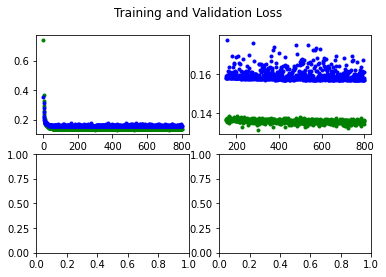

In [110]:
# TRAIN RESULT VISUALIZATION
epochs = range(1, len(loss) + 1)

fig, [[g1, g2], [g3, g4]] = plt.subplots(2, 2)
fig.suptitle('Training and Validation Loss')

loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
# All
g1.plot(epochs, loss, 'g.', label='Training loss')
g1.plot(epochs, val_loss, 'b.', label='Validation loss')
# Skip first part
SKIP = 150
g2.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
g2.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.show()

mae = history_1.history['mae']
val_mae = history_1.history['val_mae']
# All
g3.plot(epochs, mae, 'g.', label='MAE')
g3.plot(epochs, val_mae, 'b.', label='Validation MAE')
# Skip first part
g4.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
g4.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')

fig.legend()
plt.show()

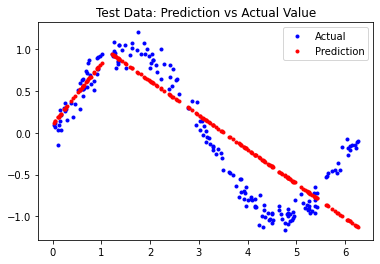

In [111]:
# MAKE PREDICTION
pred = model_1.predict(x_test)
plt.clf()
plt.title('Test Data: Prediction vs Actual Value')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, pred, 'r.', label='Prediction')
plt.legend()
plt.show()